In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

import warnings 
warnings.filterwarnings('ignore')

## Classification Feature Selection

In [3]:
# Load the BNP Paribas data set
data=pd.read_csv('../datasets/paribas.csv',nrows=50000)
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
# Inpractise, feature selection should be done after data preprocessing
# So Ideally, all the categorical variables are enocded into numbers,
# and then you can assess whether they are correlated with other features

# here for simplicity I will use only numerical variables
# Select numerical columns
numericals=['int16','int32','int64','float16','float32','float64']
numerical_vars=list(data.select_dtypes(include=numericals).columns)
data=data[numerical_vars]
data.shape

(50000, 114)

In [5]:
# Split the dataset into training and testing so as to avoid overfitting
x_train,x_test,y_train,y_test=train_test_split(data.drop(labels=['ID','target'],axis=1),
                                              data['target'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((35000, 112), (15000, 112))

In [6]:
# here we will perform the task of model training and 
# feature selection both in the same line.
# n_estimators decide the number of trees that'll be used
# in selecting the features.
sel_=SelectFromModel(RandomForestClassifier(n_estimators=10))
sel_.fit(x_train.fillna(0),y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10, n_jobs=None,
                                                 oob_score=False,


In [9]:
# number of selected features
print(np.sum(sel_.get_support()))
selected_feat=x_train.columns[sel_.get_support()]
selected_feat

8


Index(['v10', 'v12', 'v14', 'v21', 'v34', 'v40', 'v50', 'v114'], dtype='object')

In [10]:
# checking the features selected by the value of the importance of featutres 
sel_.estimator_.feature_importances_

array([0.0049002 , 0.00513105, 0.00401212, 0.00547354, 0.00542271,
       0.0043497 , 0.00466934, 0.00547985, 0.0570009 , 0.0048162 ,
       0.05966956, 0.00531977, 0.05053641, 0.00415899, 0.00531295,
       0.00408096, 0.00561565, 0.00455386, 0.00442646, 0.05535266,
       0.00378095, 0.00444867, 0.00402425, 0.00451081, 0.00529666,
       0.00386011, 0.00482396, 0.0045896 , 0.05052577, 0.0050382 ,
       0.00516738, 0.00482484, 0.00285382, 0.00557993, 0.0520815 ,
       0.0041712 , 0.00528981, 0.00445025, 0.00565907, 0.00448701,
       0.0054774 , 0.00456169, 0.00461253, 0.10233561, 0.0048074 ,
       0.00534221, 0.00534352, 0.00441813, 0.00581263, 0.0038791 ,
       0.00409786, 0.00509682, 0.00486321, 0.008455  , 0.0050784 ,
       0.00436281, 0.0044738 , 0.00462579, 0.00498452, 0.00564912,
       0.00583826, 0.00778546, 0.00447184, 0.00430472, 0.00480819,
       0.00515661, 0.00434537, 0.00544995, 0.00584093, 0.00471496,
       0.00512803, 0.004953  , 0.00590378, 0.00558161, 0.00634

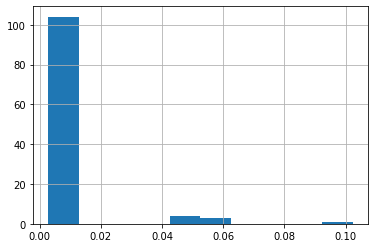

In [11]:
# Plotting the features with their respective feature importance values
pd.Series(sel_.estimator_.feature_importances_.ravel()).hist()

In [13]:
print('Total features :{}'.format(x_train.shape[1]))
print('Total Selected features: {}'.format(len(selected_feat)))
print('Feature importance greater than the mean: {}'.format(np.sum
    (sel_.estimator_.feature_importances_>sel_.estimator_.feature_importances_.mean())))

Total features :112
Total Selected features: 8
Feature importance greater than the mean: 8


Hence, these selected features can be further used for the task of Modelling.

## Regression Feature Selection

In [14]:
# Let's load the House price prediction data set
data=pd.read_csv('../datasets/houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
# Inpractise, feature selection should be done after data preprocessing
# So Ideally, all the categorical variables are enocded into numbers,
# and then you can assess whether they are correlated with other features

# here for simplicity I will use only numerical variables
# Select numerical columns
numerical_vars=data.select_dtypes(include=numericals).columns
data=data[numerical_vars]
data.shape

(1460, 38)

In [17]:
# we'll split the data set into training and testing
x_train,x_test,y_train,y_test=train_test_split(data.drop(labels=['Id','SalePrice'],axis=1),
                                              data['SalePrice'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((1022, 36), (438, 36))

In [18]:
# We'll follow the same steps as above
# and perform the task of model training and 
# Selecrion in the single step
sel_=SelectFromModel(RandomForestRegressor(n_estimators=100))
sel_.fit(x_train.fillna(0),y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                war

In [20]:
# Selected features
print('Total Selected features :{}'.format(np.sum(sel_.get_support())))
Select_feat_reg=x_train.columns[sel_.get_support()]
Select_feat_reg

Total Selected features :5


Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageArea'], dtype='object')

In [21]:
print('Total features :{}'.format(x_train.shape[1]))
print('Total Selected features: {}'.format(len(selected_feat)))
print('Feature importance greater than the mean: {}'.format(np.sum
    (sel_.estimator_.feature_importances_>sel_.estimator_.feature_importances_.mean())))

Total features :36
Total Selected features: 8
Feature importance greater than the mean: 5


Conclusion :-<br>
Selecting features by using tree derived feature importance is a very srtaightforward, fast and generally accurate way of selecting good features for machine learning. In particular, if you are going to build tree methods.

However, as said in the README.md, correlated features will show in a tree similar and lowered importance, compared to what their importance would be if the tree was built without correlated counterparts.

In situations like this, it is better to select features recursively, rather than altogether like I am doing in this lecture.